Notes:

VOLTAGE BASED ON ENGINE CRANK

Discuss -
Engine crank - what it is, what used for, how measured, false positive issue?
Engine crank pattern = RPM
State of Charge
crankshaft position sensor - wiki There are several types of sensor in use. The inductive sensor, Hall Effect sensor, magnetoresistive sensor, optical sensor. Knowing the type of sensor may be useful.
wiki One likely cause of crankshaft position sensor failure is exposure to extreme heat
camshaft position sensor is also a useful source of information and could perhaps help to prevent false positives, can we access this data also, or recommend its use in future?
Anything from the articles I'll read
Assumptions - state of charge = volts, engine crank pattern = related to RPM, all in UK, all generally the same vehicle type, 500 RPM is considered to be engine start, Petrol engines run at higher rotation speeds than diesels so assuming that all are petrol (WIKI), no electric vehicles are within the sample, Most automotive starter motors are electric, but some applications use pneumatic or hydraulic power (all using electric starter) http://www.crankshift.com/starter-motor/
assumption - The inductive sensor, Hall Effect sensor, magnetoresistive sensor, optical sensor. - wiki
Questions I'd probably have asked before starting the analysis
Would check all assumptions

SOH article
500 RPM = engine started
You'd expect a short dip in voltage before RPM increases. Is this observed in any of the vehicle crankings?
You could probably calculate state of health (SOH) of the batteries based on the information given (point 3.3)
Moreover, the aged battery requires greater voltage throughout the cranking process compared to the fresh battery due to greater voltage loss and/or increased battery resistance (see Section 3.2). p92
 A successful engine crank corresponds to an engine cranking speed of approximately 500 rpm.  p.92
 As can be seen in the engine cranking speed waveform plot of Figure 1, the crank shaft is being rotated at approximately 50-100 rpm for several tenths of a second prior to time T2. p13
 


Descriptives -

17 is outlier
purr::detect_index to identify the first 500

REMOVE AND DOCUMENT ALL OUTLIERS!!!

How many vehicles
How many types of vehicles
Any vehicle duplicates - YES
How many times was each vehicle observed? Which vehicle was most observed???

Does any vehicle show deterioration?!?!? - plot them by DATE?!

plot volts as well.

Provided dataset includes 1,431 engine crank events for 50 vehicles.
Any raw ID duplicates?
Mean not useful
Range
Min, max
Line graph, preferably visual repeating
Box plots?
Identify false positives - SS1? - what about removing any stalls?? if sequencenumber 49 RPM < 500 then remove.
Discuss latency
Sequence analysis BUPAR and TraMineR visualisation

Inferential - 

first value over 0, then first value over 500
^ average per car, then also look at range within car. And maybe make a plot of this too.

correlate everything!!!

HAVE ARTICLES / LINKS TO ALL METHODS. AND HAVE IMAGES OF EACH IF POSSIBLE!!!

Sequence analysis
Change detection
Multiple regression
BUPAR
http://www.bupar.net/processmaps.html group data into certain types and run a process map
TraMineR
Time Delay Neural Network
Nonlinear autoregressive exogenous model
Change Point Detection in Time Series
Time Delayed Regression
locally estimated scatterplot smoothing??
logistic regression to assess started, not started (and perhaps stalled too)
Decision Tree / Random Forest which can assess engine crank pattern, taking into account the dip in voltage, the increase in RPM, and whether RPM is maintained over 500 RPM


. T1 is the instant when the starter is engaged, T2 is the instant when the battery voltage signal reaches its first peak after T1, T3 is the instant when engine cranking is successfully completed, V1 is the battery voltage at T1, and V2 is the minimum battery voltage in the time interval [T2, T3]. p35 - could check SOH of battery 

# Engine Crank Patterns and State-of-Charge

***

## CONTENTS

### 1. Introduction to Engine Crank Patterns
1. Engine Crank Definitions and Terminology  
2. Relation of Voltage to Engine Crank   
3. Engine Crank Patterns  

### 2. Summarise the Data and Identify Engine Crank Patterns (Q1+Q2)
1. Overview  
    1.1. Variables Available  
    1.2. Measurements per Vehicle  
    1.3. Assumptions  
2. Common Patterns - Engine Crank
3. Common Patterns - Voltage
4. False Positive Engine Cranks  
    4.1. Incorrect Recordings  
    4.2. Engine Stalls
5. Measurement Latency  
    5.1. Partial Crank Patterns  
    5.2. Insufficient Data for SOH Analysis
6. Engine Startup Times

### 3. Identifying Methods for Determining Engine Crank Pattern
# STARTUP TIME
Sequence analysis
Change detection
Multiple regression
BUPAR
http://www.bupar.net/processmaps.html group data into certain types and run a process map
TraMineR
Time Delay Neural Network
Nonlinear autoregressive exogenous model
Change Point Detection in Time Series
Time Delayed Regression
locally estimated scatterplot smoothing??
logistic regression to assess started, not started (and perhaps stalled too)
Decision Tree / Random Forest which can assess engine crank pattern, taking into account the dip in voltage, the increase in RPM, and whether RPM is maintained over 500 RPM

### 4. Estimating State-of-Charge Based On Engine Crank Patterns


Q1) Can you summarise the data?
Q2) Can you determine the engine crank patterns? Are there any common patterns? Explain. 
Q3) Can you identify what methods can be used in order to determine the engine crank pattern?
1. Discuss the problem
2. Descriptives + Visualisation
2.1 Identify false positives
2.2 Discuss latency
3. Inferential

### 5. References

***

## 1. Introduction to Engine Crank Patterns
### 1. Engine Crank Definitions and Terminology

The crankshaft is a common engine part that converts between reciprocal (back and forth) and rotational motion [1]. The motion is measured in RPM (Revolutions Per Minute). Within internal combustion engines the reciprocal motion is provided by pistons, as seen below [2].

<img src="https://www.grc.nasa.gov/WWW/K-12/airplane/Images/cshaft.gif" alt="Pistons and Crank" width="500" height="500"/>

A starter motor is required to provide the initial energy to the crankshaft to begin its rotation, and following this input the engine can operate under its own power [3]. An engine crank is considered to have been successful at "an engine cranking speed of approximately 500 RPM" [4, p.92]. Therefore, a 500 RPM criterion is used throughout.

### 2. Relation of Voltage to Engine Crank

When the starter is engaged and is providing the high initial torque to the crankshaft, there is a predictable dip in voltage, as illustrated in the below figure [4] (where T1 is the starter engaging, and T2 indicates 500 RPM).

<img src="Waveforms.png" alt="Waveforms" width="500" height="500"/>

### 3. Engine Crank Patterns

Engine crank patterns within this exploratory analysis are expected to follow the general form shown in the below figure.

<img src="EnginePattern.png" alt="EnginePattern" width="500" height="500"/>

Naturally, patterns may differ according to a variety of variables such as vehicle type, fuel type and so on. These assumptions are discussed in Section 2, Part 1.3.

## 2. Summarise the Data and Identify Engine Crank Patterns (Q1+Q2)
### 1. Overview  
### &nbsp;&nbsp;&nbsp;&nbsp;1.1. Variables Available 

Variables within this sample dataset include: 
- Vehicle ID: ID number from 1-50
- Raw Data ID: Crank event ID consisting of 10 numeric digits
- Sequence Number: Sequence number of crank event from 0-49 
- Date/Time: For each observation
- Voltage: Battery voltage
- Engine RPM
- Temperature: Ambient temperature in degrees Celsius

An example snippet of the dataset is below.

In [7]:
# importing packages to be used in this analysis
suppressPackageStartupMessages(library(readxl)) # to import the dataset
suppressPackageStartupMessages(library(ggplot2)) # to plot graphs
suppressPackageStartupMessages(library(dplyr)) # to manipulate/wrangle data
suppressPackageStartupMessages(library(psych)) # useful for descriptive analysis
suppressPackageStartupMessages(library(grid)) # to put multiple plots on one grid

options(scipen=999) # to reduce unnecessary scientific notation in output

# import the dataframe
df <- read_excel("~/Documents/MicroData/RProject/AI_Research Assessment Dataset_JDS_UK_2109_v1.xlsx")

# change variable names to be easier to read and type out quickly during analysis
df <- df %>% select(VehicleID = `Vehicle ID`,
              RawDataId = `Raw Data ID`,
              SequenceNumber = `Sequence\r\nNumber`,
              DateTime = `Date/Time`,
              Voltage = `Voltage \r\n(Volts)`,
              RPM,
              Temp = `Temperature \r\n(Degrees Celcius)`)

# observe the first six rows
head(df)

VehicleID,RawDataId,SequenceNumber,DateTime,Voltage,RPM,Temp
23,3885993473,0,2015-02-01 01:09:24,12.17,0,2
23,3885993473,1,2015-02-01 01:09:24,12.20,0,2
23,3885993473,2,2015-02-01 01:09:24,12.20,0,2
23,3885993473,3,2015-02-01 01:09:24,12.18,0,2
23,3885993473,4,2015-02-01 01:09:24,12.18,0,2
23,3885993473,5,2015-02-01 01:09:24,12.19,0,2


### &nbsp;&nbsp;&nbsp;&nbsp;1.2. Measurements per Vehicle

Although there are 1431 crank events measured for 50 vehicle, each vehicle is not measured the same number of times.

In [10]:
# count the frequency of vehicle ID (showing total observations for each vehicle)
n <- count(df, VehicleID)

# divide this value by 50 (since there are 50 observations in a crank event)
individual_observations <- n %>% mutate(n = n/50)

# observe descriptive statistics based on vehicle observations
describe(individual_observations$n)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,49,29.20408,5.784244,31,30.63415,0,6,33,27,-3.451692,10.41229,0.8263206


The mean number of observations is 29.20 (SD=5.78). 

From the full output table (not shown), one can see that vehicle 23 is observed the most at 33 observations.

The least observed vehicles are vehicles 18 (6 observations) and 28 (7 observations).

### &nbsp;&nbsp;&nbsp;&nbsp;1.3. Assumptions  

There are several assumptions that I have had to make and take note of during this analysis. In a real data-analysis scenario I would have consulted with an engineer before analysis to ensure that my assumptions are correct.

These assumptions are:
1. 'State-of-charge' of the battery is equal to the voltage in the dataset
2. Engine crank pattern is based on the RPM provided
3. All vehicles are of the same type (i.e. car/lorry/JCB)
4. 500 RPM is considered to be a successful engine start [4]
5. Vehicles are all petrol (or all diesel). Petrol and diesel cars run at different RPM, so it's a key factor to consider
6. No electric vehicles are within the sample
7. All starter motors are electric
8. The sensors used to identify crank position are all the same (given that there are a variety of sensors with different calibrations - inductive sensor, Hall Effect sensor, magnetoresistive sensor and optical sensor)

### 2. Common Patterns - Engine Crank

Given that engine crank patterns are expected to follow the form of that shown above, the best place to begin would be through visualisation, rather than assessing descriptives such as the mean or standard deviation.

Firstly, average crank patterns (across vehicle) can be observed.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


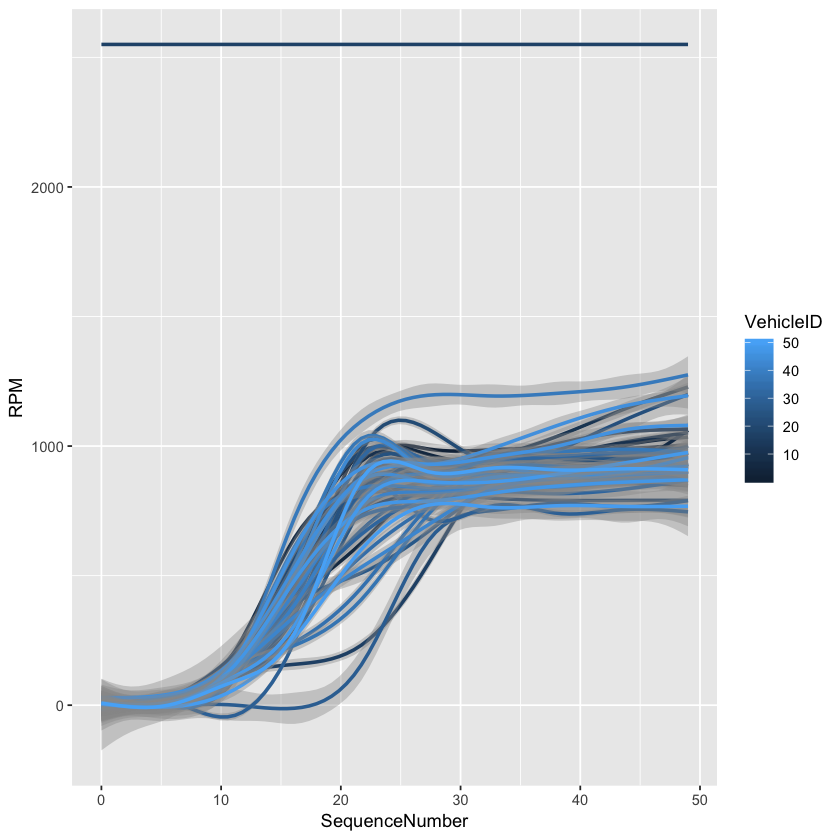

In [15]:
# plot a smooth line plot which averages engine crank pattern across vehicle
# the grey part is the standard error for each vehicle
plot <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, group=VehicleID, colour=VehicleID)) + geom_smooth()
plot

Evidently there is a vehicle with RPM constantly around 2550, which should be removed (vehicle 17). This will be discussed further in Part 4 of this Section.

Removing this vehicle the figure looks as follows.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


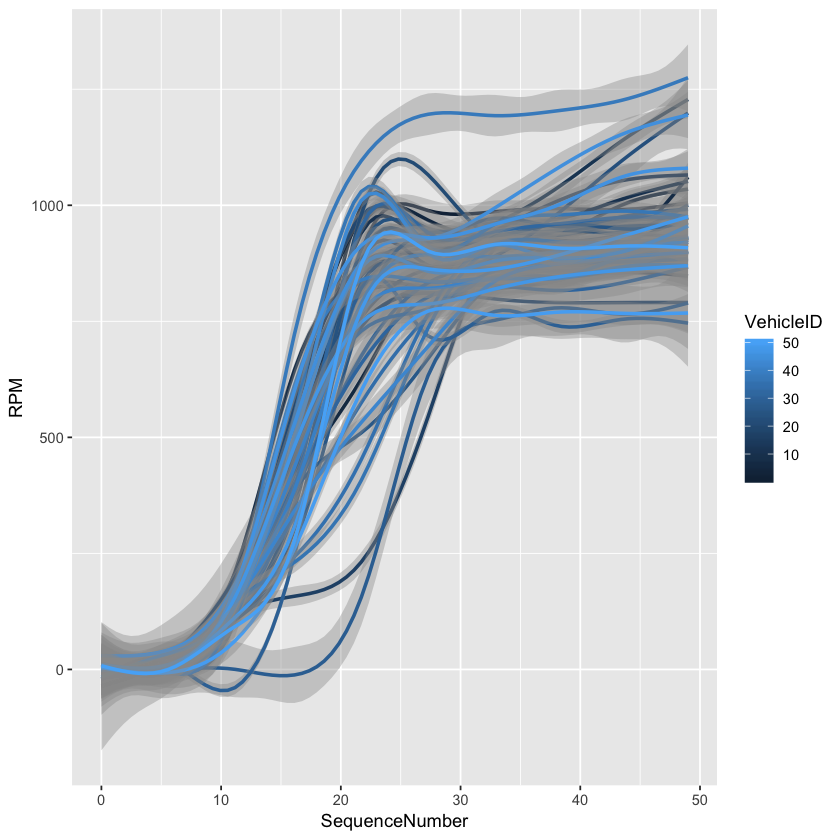

In [16]:
# remove vehicle 17
df <- df %>% filter(VehicleID != 17)

# make the same plot
plot <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, group=VehicleID, colour=VehicleID)) + geom_smooth()
plot

The engine crank patterns observed are very similar to those shown in the figures in Section 1 Part 3. There is a low period of RPM (where the engine is not running) followed by a large positive increase in the RPM as the starter provides high torque input to start the engine, followed by maintenance or a slight dip in the RPM.

This aggregate graph does not illustrate individual engine crank patterns well. For that, we plot a line plot of every individual crank pattern.

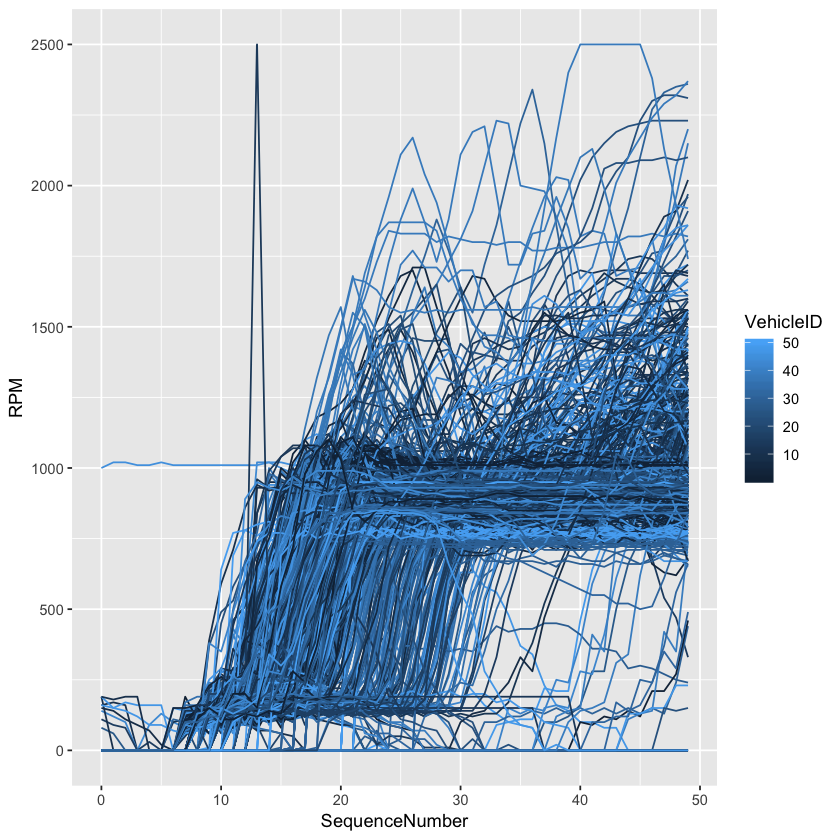

In [18]:
# create a line plot for each individual crank event
# it will look a little messy, but will give a much more detailed picture of the crank events occurring
plot3 <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, colour=VehicleID, group=RawDataId)) + geom_line() 
plot3

As seen in the figure above, the general pattern is that from SequenceNumber 0-10 the RPM of the vehicle is low, followed by the expected positive increase in RPM. After this increase, there is a variety of trajectories for the RPM - some increase, some oscillate up and down.

One vehicle's crank pattern maintains a steady ~1000RPM, which seems to be an outlier, along with the crank pattern that peaks to 2500RPM at around SequenceNumber 13. These outliers will not currently be removed (they don't ruin the visualisation as vehicle 17 did) but will be discussed in Part 4 of this Section.

From the figure, most engines seem to start the crank event at SequenceNumber 6. Some crank events have a rise in RPM around SequenceNumber 10 whereas others undergo this change around SequenceNumber 30. This demonstrates variations in the engine startup time, which will be discussed in Part 6 of this Section.

### 3. Common Patterns - Voltage















### 4. False Positive Engine Cranks  



### &nbsp;&nbsp;&nbsp;&nbsp;4.1. Incorrect Recordings  



### &nbsp;&nbsp;&nbsp;&nbsp;4.2. Engine Stalls



### 5. Measurement Latency  



### &nbsp;&nbsp;&nbsp;&nbsp;5.1. Partial Crank Patterns  



### &nbsp;&nbsp;&nbsp;&nbsp;5.2. Insufficient Data for SOH Analysis



### 6. Engine Startup Times

# 3. Identifying Methods for Determining Engine Crank Pattern

# 4. Estimating State-of-Charge Based On Engine Crank Patterns

## 5. References

[1] Yu, B. Y., Feng, Q. K., & Yu, X. L. (2013). Dynamic simulation and stress analysis for reciprocating compressor crankshaft. Proceedings of the Institution of Mechanical Engineers, Part C: Journal of Mechanical Engineering Science, 227(4), 845-851. DOI: https://doi.org/10.1177/0954406212453523  
[2] Hall, H. (2015) Engine power train. Retrieved from https://www.grc.nasa.gov/WWW/K-12/airplane/powert.html  
[3] Chowanietz, E. (1995). Automobile Electronics. London: Reed Elsevier.





[X] Laukkonen, J. D. (2013). What is a starter motor? Retrieved from http://www.crankshift.com/starter-motor/

In [ ]:
library(readxl)
library(ggplot2)
library(dplyr)
library(psych)
library(grid)
library(purrr)

options(scipen=999) # to reduce unnecessary scientific notation in output

df <- read_excel("~/Documents/MicroData/RProject/AI_Research Assessment Dataset_JDS_UK_2109_v1.xlsx")

# ANY NAs?!?!?

names(df) # get the column names

# edit the column names to remove new lines, spaces etc
df <- df %>% select(VehicleID = `Vehicle ID`,
              RawDataId = `Raw Data ID`,
              SequenceNumber = `Sequence\r\nNumber`,
              DateTime = `Date/Time`,
              Voltage = `Voltage \r\n(Volts)`,
              RPM,
              Temp = `Temperature \r\n(Degrees Celcius)`)

# df <- df %>% filter(VehicleID != 17) # all of 17 are outliers (need to prove)

n <- count(df, VehicleID)
individual_observations <- n %>% mutate(n = n/50)
individual_observations

describe(individual_observations$n)
# mean observations are 29.65 (sd 4.94)
# min 6
# max 33
# most observed 23
# least observed 18 (6 obs), 28 (7 obs)

# assumption check - all raw data IDs are indeed individual


##############################################
# RPM GRAPHS
##############################################

# smooth but with se
plot <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, group=VehicleID, colour=VehicleID)) + geom_smooth()
plot
# facet wrap plot
plot + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)

# smooth no se
plot2 <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, colour=VehicleID)) + geom_smooth(aes(group=VehicleID),se=FALSE)
plot2

# line all
plot3 <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, colour=VehicleID, group=RawDataId)) + geom_line() 
plot3
# facet wrap plot
plot3 + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)


# line individual
df_2 <- df %>% filter(VehicleID == 1)
plot3 <- ggplot(data = df_2, aes(x=SequenceNumber, y=RPM, colour=VehicleID, group=RawDataId)) + geom_line() 
plot3


# line individual vehicleID - PERFECT - per vehicle RPM
# df_2 <- df %>% filter(VehicleID == 1)
plot4 <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, colour=VehicleID, group=RawDataId)) + geom_line() 
plot4
plot4 + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)

#######
# 17 should be removed. 13 has a spike to be removed. 45 has a weird one that stays at 1000

# some cars seem to work fine. some such as 47 and 23 seem to stall quite a lot


# 35 seems to be a car that may potentially be deteriorating over time CHECKING DATE
df_2 <- df %>% filter(VehicleID == 35)
plot5 <- ggplot(data = df_2, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plot5

# 35 seems to be a car that may potentially be deteriorating over time CHECKING TEMP
#### FOUND A PATTERN
df_2 <- df %>% filter(VehicleID == 35)
plot8 <- ggplot(data = df_2, aes(x=SequenceNumber, y=RPM, colour=Temp, group=RawDataId)) + geom_line() 
plot8

# 36 also seems to be a car that may potentially be deteriorating over time CHECKING DATE
df_3 <- df %>% filter(VehicleID == 36)
plot6 <- ggplot(data = df_3, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plot6

# 36 also seems to be a car that may potentially be changing over SOMETHING - CHECKING TEMP
plot7 <- ggplot(data = df_3, aes(x=SequenceNumber, y=RPM, colour=Temp, group=RawDataId)) + geom_line() 
plot7


# line individual vehicleID - PERFECT - per vehicle RPM colour TEMP - shows nothing useful - all dark
# df_2 <- df %>% filter(VehicleID == 1)
plot9 <- ggplot(data = df, aes(x=SequenceNumber, y=RPM, colour=Temp, group=RawDataId)) + geom_line() 
plot9
plot9 + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)




##############################################
# TEMP GRAPHS
##############################################

plot10 <- ggplot(data = df, aes(x=SequenceNumber, y=Temp, colour=Temp, group=RawDataId)) + geom_line() 
plot10
plot10 + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)

# cars with high temp at least once:
# 9 26 30 36 42 47 49


##############################################
# VOLTAGE GRAPHS
##############################################

plot10 <- ggplot(data = df, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
plot10
plot10 + facet_wrap(facets=df$VehicleID, nrow = 10, ncol = 5)

# car 1 has an anomalous temp in one of its starts

# just car 36 voltage
plot11 <- ggplot(data = df_3, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
plot11


# all car volts graphs - 3 looks best!!!

# volt_1 <- df %>% filter(VehicleID == 1)
# carvolt1 <- ggplot(data = volt_1, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt1
# 
# volt_2 <- df %>% filter(VehicleID == 2)
# carvolt2 <- ggplot(data = volt_2, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt2

# LOOKS GOOD
volt_3 <- df %>% filter(VehicleID == 3)
carvolt3 <- ggplot(data = volt_3, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
carvolt3

# volt_4 <- df %>% filter(VehicleID == 4)
# carvolt4 <- ggplot(data = volt_4, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt4
# 
# volt_5 <- df %>% filter(VehicleID == 5)
# carvolt5 <- ggplot(data = volt_5, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt5
# 
# volt_6 <- df %>% filter(VehicleID == 6)
# carvolt6 <- ggplot(data = volt_6, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt6
# 
# volt_7 <- df %>% filter(VehicleID == 7)
# carvolt7 <- ggplot(data = volt_7, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt7
# 
# volt_8 <- df %>% filter(VehicleID == 8)
# carvolt8 <- ggplot(data = volt_8, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt8
# 
# volt_9 <- df %>% filter(VehicleID == 9)
# carvolt9 <- ggplot(data = volt_9, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt9
# 
# volt_10 <- df %>% filter(VehicleID == 10)
# carvolt10 <- ggplot(data = volt_10, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt10
# 
# volt_11 <- df %>% filter(VehicleID == 11)
# carvolt11 <- ggplot(data = volt_11, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt11
# 
# volt_12 <- df %>% filter(VehicleID == 12)
# carvolt12 <- ggplot(data = volt_12, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt12
# 
# volt_13 <- df %>% filter(VehicleID == 13)
# carvolt13 <- ggplot(data = volt_13, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt13
# 
# volt_14 <- df %>% filter(VehicleID == 14)
# carvolt14 <- ggplot(data = volt_14, aes(x=SequenceNumber, y=Voltage, colour=VehicleID, group=RawDataId)) + geom_line() 
# carvolt14


####
# plot volt above RPM or on same graph
####

plot12 <- ggplot(data = volt_3, aes(x=SequenceNumber, y=Voltage, colour=RawDataId, group=RawDataId)) + geom_line() + geom_vline(xintercept = 6.03) + geom_vline(xintercept = 7.03)
plot12

plot13 <- ggplot(data = volt_3, aes(x=SequenceNumber, y=RPM, colour=RawDataId, group=RawDataId))  + geom_line() + geom_vline(xintercept = 6.03) + geom_vline(xintercept = 7.03)
plot13

grid.newpage()
grid.draw(rbind(ggplotGrob(plot12), ggplotGrob(plot13), size = "last"))

####

volt_36 <- df %>% filter(VehicleID == 36)

plot14 <- ggplot(data = volt_36, aes(x=SequenceNumber, y=Voltage, colour=RawDataId, group=RawDataId)) + geom_line() + geom_vline(xintercept = 6.03) + geom_vline(xintercept = 7.03)
plot14

plot15 <- ggplot(data = volt_36, aes(x=SequenceNumber, y=RPM, colour=RawDataId, group=RawDataId))  + geom_line() + geom_vline(xintercept = 6.03) + geom_vline(xintercept = 7.03)
plot15

grid.newpage()
grid.draw(rbind(ggplotGrob(plot14), ggplotGrob(plot15), size = "last"))


######

# DATE to observe deterioration
date1 <- df %>% filter(VehicleID == 1)
plotdate1 <- ggplot(data = date1, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate1

date2 <- df %>% filter(VehicleID == 2)
plotdate2 <- ggplot(data = date2, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate2

date3 <- df %>% filter(VehicleID == 3)
plotdate3 <- ggplot(data = date3, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate3

date4 <- df %>% filter(VehicleID == 4)
plotdate4 <- ggplot(data = date4, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate4

date5 <- df %>% filter(VehicleID == 5)
plotdate5 <- ggplot(data = date5, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate5

date6 <- df %>% filter(VehicleID == 6)
plotdate6 <- ggplot(data = date6, aes(x=SequenceNumber, y=RPM, colour=DateTime, group=RawDataId)) + geom_line() 
plotdate6


# they generally seem to start faster the later in the year
# maybe temp increases over the year

temp_date_plot <- ggplot(data = df, aes(x=DateTime, y=Temp, colour=DateTime, group=RawDataId)) + geom_point() 
temp_date_plot

# there are two date outliers, I'll remove them and replot
df_minus_date_outliers <- df %>% filter(RawDataId != 4295672509) %>% filter(RawDataId != 4587082901)

temp_date_plot <- ggplot(data = df_minus_date_outliers, aes(x=DateTime, y=Temp, colour=DateTime, group=RawDataId)) + geom_point() 
temp_date_plot

# seems a bit of a positive correlation between date and temp. there are some outliers to the data
# over 100 seems to be outliers, going to use a cutoff of 50C and replot

#### good plot
df_minus_date_and_temp_outliers <- df_minus_date_outliers %>% filter(Temp < 50)
temp_date_plot2 <- ggplot(data = df_minus_date_and_temp_outliers, aes(x=DateTime, y=Temp, colour=DateTime, group=RawDataId)) + geom_point() 
temp_date_plot2



# REMOVING OUTLIERS
# 17 should be removed. 13 has a spike to be removed. 45 has a weird one that stays at 1000
# 5272677670 seems to be an outlier (spike) (13)
# 4390150868 seems to stay around 100 throughout (45)
# there are two date outliers, I'll remove them and replot
# df_minus_date_outliers <- df %>% filter(RawDataId != 4295672509) %>% filter(RawDataId != 4587082901)
# df_minus_date_and_temp_outliers <- df_minus_date_outliers %>% filter(Temp < 50) temp outliers

# plot 13's spike and 45's 1000

# 13's spike
spike13 <- df %>% filter(RawDataId == 5272677670)
plot16 <- ggplot(data = spike13, aes(x=SequenceNumber, y=RPM, group=RawDataId)) + geom_line() 
plot16

# 45's 1000
flat1000 <- df %>% filter(RawDataId == 4390150868)
plot17 <- ggplot(data = flat1000, aes(x=SequenceNumber, y=RPM, group=RawDataId)) + geom_line() 
plot17
# correct. needs removing!


# REMOVING 17 and 13's spike and 45's 1000
df_filtered <- df %>% 
  filter(RawDataId != 5272677670) %>%
  filter(RawDataId != 4390150868) %>% 
  filter(VehicleID != 17)



# in terms of false positives / stalls - remove any with RPM < 500 at sequencenumber 49
# how? some special filter.

# identify which ones have stalled, and get frequency (and percent!!!) of stalls

# filter to get sequence number == 49
# filter to get any < 500
# then you have all of the RawIDs
stalls <- df_filtered %>% 
  filter(SequenceNumber == 49) %>% 
  filter(RPM < 500)

describe(stalls)


# filter df_filtered to get all stalled
stalldf <- df_filtered %>% filter(RawDataId %in% stalls$RawDataId)


# plot all stalled #### GOOD PLOT
stallsplot <- ggplot(data = stalldf, aes(x=SequenceNumber, y=RPM, colour=VehicleID, group=RawDataId)) + geom_line() 
stallsplot


# filter df_filtered to remove all stalled
# make "ni" --> opposite of %in%!
'%ni%' <- Negate('%in%')
df_clean <- df_filtered %>% filter(RawDataId %ni% stalls$RawDataId)

#### df_clean has 69950 observations



### later, do first value over 0 and first value over 500 RPM, then find average time difference,
### BUT MAKE SURE YOU HAVE REMOVED ALL THE STALLS!!!
# all stalls removed

# index first RPM value over 0
# didn't work
# over_zero_func <- function(x) x > 0
# over_zero_df <- df_clean %>% group_by(RawDataId) %>% 
#   detect_index(over_zero_func)

# didn't work
# grouped_over_zero_df <- df_clean %>% group_by(RawDataId) 
# match(grouped_over_zero_df$RPM > 0, grouped_over_zero_df)

# group_by RawID, filter all RPM over 0, get min sequence of each
over_zero_df <- df_clean %>% group_by(RawDataId) %>% filter(RPM > 0) %>% 
  summarise(start = min(SequenceNumber))

over_500_df <- df_clean %>% group_by(RawDataId) %>% filter(RPM > 500) %>% 
  summarise(finish = min(SequenceNumber))

# join the start and finish onto the main dataframe
clean_plus_start_finish_df <- df_clean %>% 
  full_join(over_zero_df) %>% 
  full_join(over_500_df)

# create a time difference variable to observe how long each car takes to start for each crank event
clean_full_time_difference <- clean_plus_start_finish_df %>% 
  mutate(sequence_diff = finish - start) %>% 
  # multiply sequence difference by 0.1 because each sequence is 0.1 seconds
  mutate(time_to_start = sequence_diff*0.1) 

# plot start time
plot18_df <- clean_full_time_difference %>% filter(SequenceNumber == 0) %>% 
  # filtered because the values of start time are duplicated across observations
  filter(RawDataId != 4295672509) %>% # remove date outliers which ruin the graphic
  filter(RawDataId != 4587082901) %>% 
  filter(Temp < 50) # remove temp outliers also
plot18 <- ggplot(data = plot18_df, aes(x=DateTime, y=time_to_start, group=RawDataId)) + geom_boxplot() 
plot18
plot18 + facet_wrap(facets=plot18_df$VehicleID, ncol = 8)

# 29 and 49 seem to have a starting time of 0

# plot temp and time to start
plot19 <- ggplot(data = plot18_df, aes(x=Temp, y=time_to_start, group=RawDataId)) + geom_boxplot() 
plot19
plot19 + facet_wrap(facets=plot18_df$VehicleID, ncol = 8)


# get average time to start for each vehicle


# correlate time to start with date, covariate of temp (or multiple regression)





# plot star

### also do regression based on previous 5 RPM predicting current voltage (but remove date and temp outliers)






# graphs observing individuals (just a working plate)
stallermaybe <- df_filtered %>% filter(RawDataId == 4841454647)
plotstallm <- ggplot(data = stallermaybe, aes(x=SequenceNumber, y=RPM, group=RawDataId)) + geom_line() 
plotstallm
